# **STANDARD NOTEBOOK TO GET RESULTS**

## 1. Clean the Data

In [76]:
import pandas as pd 
import process
import numpy as np 
# Jerome path : r'C:\Users\33640\OneDrive\Documents\GitHub\Portfolio_clustering_project\Data\DataBase.csv'
# Nail path : '/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DataBase.csv'
df = pd.read_csv(r'/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DataBase.csv')

df.set_index('ticker', inplace=True)

df.columns = pd.to_datetime(df.columns.str[1:], format='%Y%m%d').strftime('%d/%m/%Y')

df_cleaned = df.fillna(0) # Utilisez la méthode fillna(0) pour remplacer les NaN par 0

df_cleaned = df_cleaned.transpose() ## WE WANT COLUMNS TO BE VECTOR OF RETURN FOR A GIVEN TICKER

In [77]:
(1003 - 751)/5

50.4

In [78]:
df_cleaned.iloc[751:1003, :]

ticker,AA,ABM,ABT,ADI,ADM,ADX,AEE,AEG,AEM,AEP,...,XLI,XLK,XLP,XLU,XLV,XLY,XOM,XRX,YUM,ZTR
02/01/2003,0.022328,0.025447,-0.013639,0.065826,0.001599,0.020523,0.012615,0.053306,0.023021,0.021522,...,0.013826,0.045910,0.015373,0.011288,0.019253,0.027480,0.013339,0.008615,0.027443,0.009099
03/01/2003,0.010560,0.004469,0.013443,0.019803,0.011976,0.004619,0.013152,0.003617,0.025117,0.020025,...,-0.002828,0.007049,-0.005894,0.000000,0.009116,-0.016508,0.007067,0.014599,-0.018164,0.003597
06/01/2003,0.017795,0.031183,0.012859,0.041033,0.005562,0.011878,0.036227,0.036053,-0.026825,0.040139,...,0.003749,0.036753,0.008348,0.046497,0.007569,0.010957,0.025896,0.025196,0.021846,0.007220
07/01/2003,-0.000820,-0.008288,-0.044776,-0.006826,-0.010396,-0.006338,-0.035291,0.005168,-0.031134,-0.017530,...,-0.006564,0.006072,-0.003939,-0.012764,-0.012670,-0.005044,-0.025282,-0.009581,-0.003968,0.005352
08/01/2003,-0.011377,0.025692,0.015171,-0.026668,-0.003234,-0.014625,0.006498,-0.022490,0.036518,-0.001677,...,-0.009479,-0.016755,-0.004951,0.003933,-0.002933,-0.003821,-0.004277,0.002421,0.004760,0.001797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24/12/2003,-0.009945,-0.007892,0.007712,0.003117,0.006601,0.006509,-0.001318,-0.007117,0.010480,0.001330,...,-0.014926,-0.001994,-0.003257,-0.005610,0.002366,-0.001292,0.005286,0.010929,-0.002074,0.004032
26/12/2003,0.010457,0.004558,0.000854,0.001338,-0.003947,0.000000,-0.002857,0.007168,0.011997,-0.005316,...,-0.006383,-0.002487,0.003731,0.001730,0.000674,0.002577,0.006011,-0.014599,0.002679,0.004024
29/12/2003,0.026300,-0.001693,0.008734,0.015157,-0.001972,0.012903,0.001972,0.017981,0.027536,0.009296,...,0.005220,0.015779,0.002779,0.013388,0.003011,0.003514,0.011899,-0.000732,0.014457,0.004024
30/12/2003,-0.015363,0.009495,-0.004927,-0.001312,0.003295,-0.000806,0.008500,0.002055,-0.011494,0.010544,...,-0.011900,-0.001958,0.000462,-0.000428,-0.001664,-0.004469,0.002461,0.008091,0.005242,0.004016


## 2. Run the code

Once the run is completed, you have: 
* the overall return -> overall return
* the PnL associated to the strategy
* the daily PnL associated to the strategy
* the Sharpe Ratio associated to the strategy

In [79]:
import warnings 
from PyFolioC import PyFolioC
warnings.filterwarnings("ignore") ## so that there are no polluting warnings as output of this cell

##################################################################### PARAMETERS #####################################################################
historical_data = df_cleaned
number_of_repetitions = 10
lookback_window = [501,751] ## so that the difference is a multiple of 5 --> year 2016
evaluation_window = 2
number_of_clusters = 38
cov_method = 'SPONGE'
sigma = 0.01
eta = 0.01

beta = 0.95
K = 4  # Number of fold for the cross validation
######################################################################################################################################################

##################################################################### PORTFOLIO ######################################################################
portfolio = PyFolioC(number_of_repetitions=number_of_repetitions, historical_data=historical_data, lookback_window=lookback_window, evaluation_window=evaluation_window, number_of_clusters=number_of_clusters, sigma=sigma, eta=eta, short_selling=False, cov_method=cov_method, beta=beta, number_folds=K)

## year 2003 ==> 751:1003 
## year 2008-2009 ==> 2007:2262 if evaluation_window == 2
## year 2008-2009 ==> 2007:2265 if evaluation_window == 5
## year 2012-2013 ==> 3016:3265
## year 2018-2019 ==> 4524:4774
## year 2016-2019 ==> 4021:4774

In [68]:
overall_return, PnL, portfolio_value, daily_PnL = portfolio.sliding_window(126) ## 150 --> 3 years

step 1/126, portfolio value: 1.0005
step 2/126, portfolio value: 1.0004
step 3/126, portfolio value: 1.0000
step 4/126, portfolio value: 0.9999
step 5/126, portfolio value: 1.0005
step 6/126, portfolio value: 1.0008
step 7/126, portfolio value: 1.0006
step 8/126, portfolio value: 1.0008
step 9/126, portfolio value: 1.0013
step 10/126, portfolio value: 1.0014
step 11/126, portfolio value: 1.0016
step 12/126, portfolio value: 1.0016
step 13/126, portfolio value: 1.0019
step 14/126, portfolio value: 1.0018
step 15/126, portfolio value: 1.0010
step 16/126, portfolio value: 1.0009
step 17/126, portfolio value: 1.0011
step 18/126, portfolio value: 1.0015
step 19/126, portfolio value: 1.0021
step 20/126, portfolio value: 1.0020
step 21/126, portfolio value: 1.0045
step 22/126, portfolio value: 1.0047
step 23/126, portfolio value: 1.0050
step 24/126, portfolio value: 1.0048
step 25/126, portfolio value: 1.0048
step 26/126, portfolio value: 1.0048
step 27/126, portfolio value: 1.0040
step 28/12

## 3. Save the results to csv files (APPLY THE CELLS ONLY ONCE AS IT CREATES 3 FILES !!)

In [69]:
year = '2016'
clustering_method = 'SPONGE_short_selling'

## process.save_to_csv(year=year, clustering_method=clustering_method)

df_daily = pd.DataFrame(daily_PnL, columns=['Daily PnL'])

df_daily.to_csv(f'daily_{year}_{clustering_method}_{evaluation_window}.csv', index=False)

df_PnL = pd.DataFrame(PnL, columns=['PnL'])

df_PnL.to_csv(f'PnL_{year}_{clustering_method}_{evaluation_window}.csv', index=False)

df_overall_return = pd.DataFrame(overall_return.values, columns=['Return'])

df_overall_return.to_csv(f'Overall_return_{year}_{clustering_method}_{evaluation_window}.csv', index=False)

## 4. Get SP500 data for comparison

In [18]:
len(overall_return)

50

In [74]:
start_date = '2003-01-01'
end_date = '2004-01-02'
year = '2003'
clustering_method = 'SPONGE_no_short_selling'

sp500_PnL = process.get_sp500_PnL(start_date, end_date)
print(len(sp500_PnL))
print(len(overall_return))

[*********************100%%**********************]  1 of 1 completed
252
252


## 5. Plot Portfolio Cumulative PnL vs SP500 Cumulative PnL

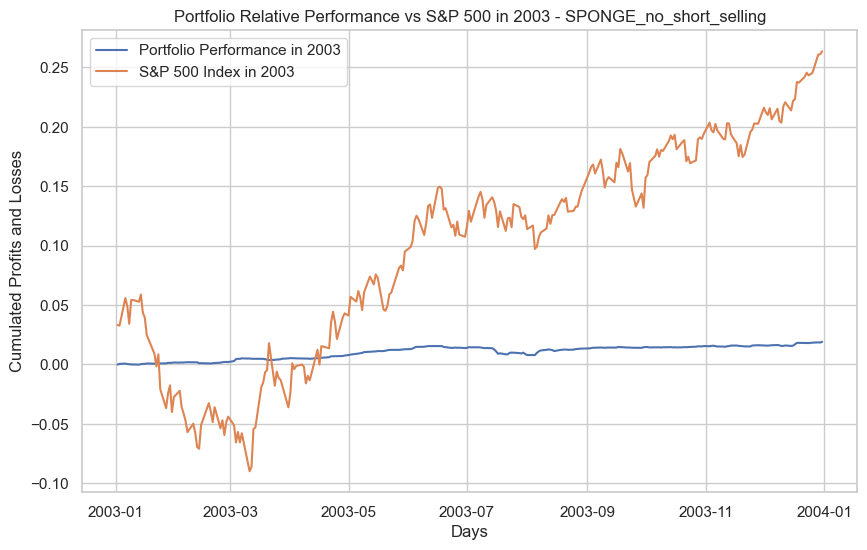

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the cumulative returns
portfolio_cumulative = pd.DataFrame(index = sp500_PnL.index, columns=[f'Portfolio Performance in {year}'], data=PnL)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the relative performance using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=portfolio_cumulative)
sns.lineplot(data=sp500_PnL.cumsum(), label=f'S&P 500 Index in {year}')
plt.xlabel('Days')
plt.ylabel('Cumulated Profits and Losses')
plt.title(f'Portfolio Relative Performance vs S&P 500 in {year} - {clustering_method}')
plt.legend()
plt.show()

# 6. Plot portfolio value alone

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création de l'axe des abscisses (nombre de jours)

portfolio_value = pd.DataFrame(index = sp500_PnL.index, columns=[f'Portfolio Value in {year}'], data=portfolio_value)

# Configuration de seaborn pour un style agréable
sns.set(style="whitegrid")

# Tracer la PnL cumulative avec seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(portfolio_value, color='blue')

# Ajouter des titres et des légendes
plt.title(f'Portfolio Value of Time for an Initial Investment of $1 in {year} - {clustering_method}')
plt.xlabel('Days')
plt.ylabel('Portfolio Value')

# Afficher le graphique
plt.show()

ValueError: Shape of passed values is (51, 1), indices imply (251, 1)

# 7. Barplot Daily PnL vs SP500

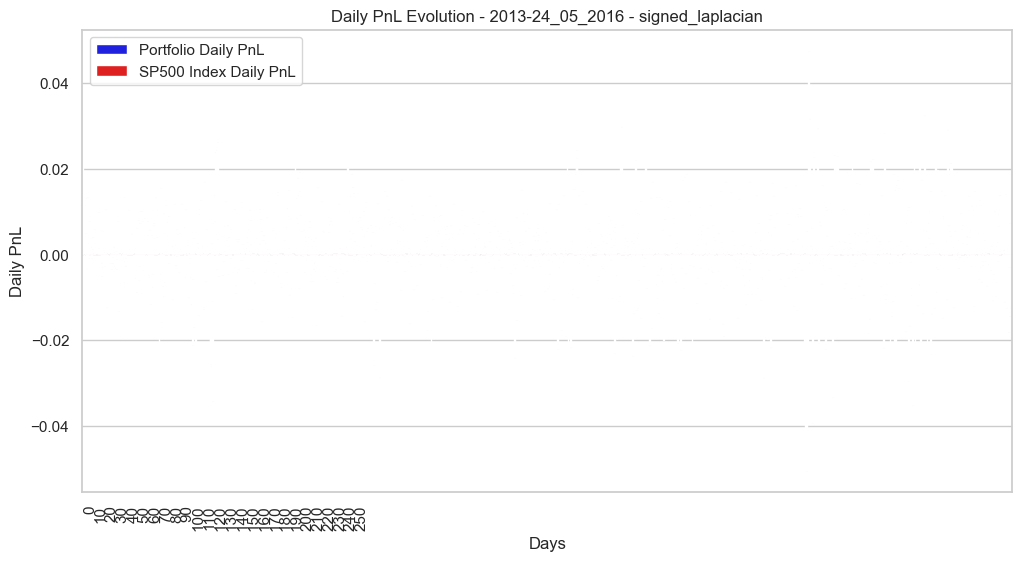

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création de l'axe des abscisses (nombre de jours)
days = np.arange(1, len(daily_PnL) + 1)

# Configuration de seaborn pour un style agréable
sns.set(style="whitegrid")

# Tracer l'évolution quotidienne de la PnL sous forme de diagramme à barres avec seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=days, y=daily_PnL, color='blue', width=0.8, label='Portfolio Daily PnL')  # Ajustez la largeur ici
ax = sns.barplot(x=days, y=sp500_PnL, color='red', width=0.8, label='SP500 Index Daily PnL')

# Rotation des étiquettes de l'axe des abscisses de 45 degrés avec un ajustement
ax.set_xticks(np.arange(0,251,10))
ax.set_xticklabels(ax.get_xticks(), rotation=90, ha='right', rotation_mode='anchor')

# Ajouter des titres et des légendes
plt.title(f'Daily PnL Evolution - {year} - {clustering_method}')
plt.xlabel('Days')
plt.ylabel('Daily PnL')
plt.legend()

# Afficher le graphique
plt.show()

# 8. Plot everything (SPONGE vs Signed Laplacian vs SP500)

In [73]:
sp500_PnL.iloc[:-2]

Date
2014-01-02   -0.007520
2014-01-03   -0.000997
2014-01-06   -0.003001
2014-01-07    0.004968
2014-01-08   -0.000222
                ...   
2014-12-22    0.005017
2014-12-23    0.000374
2014-12-24   -0.000742
2014-12-26    0.002422
2014-12-29    0.001593
Name: Daily PnL, Length: 250, dtype: float64

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

PnL_SPONGE_5 = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Outputs/2013-2016/PnL_2013-24_05_2016_SPONGE_5_2.csv')
PnL_SPONGE_1 = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Outputs/2018/PnL_2018_SPONGE_1.csv')
PnL_SPONGE_sym_5 = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Outputs/2013-2016/PnL_2013-24_05_2016_SPONGE_sym_5_2.csv')
PnL_SL_5 = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Outputs/2013-2016/PnL_2013-24_05_2016_signed_laplacian_5_2.csv')

#PnL_SPONGE_5_2 = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Outputs/2019/PnL_2019_SPONGE_5_2.csv')
#PnL_SPONGE_sym_5_2 = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Outputs/2019/PnL_2019_SPONGE_sym_5_2.csv')
#PnL_SL_5_2 = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Outputs/2019/PnL_2019_signed_laplacian_5_2.csv')

# Calculate the cumulative returns
portfolio_cumulative_SL_5 = pd.DataFrame(index=sp500_PnL.index, columns=[f'Signed Laplacian Portfolio Performance in {year}'], data=PnL_SL_5.values)
portfolio_cumulative_SPONGE_5 = pd.DataFrame(index=sp500_PnL.index, columns=[f'SPONGE Portfolio Performance in {year}'], data=PnL_SPONGE_5.values)
portfolio_cumulative_SPONGE_1 = pd.DataFrame(index=sp500_PnL.index, columns=[f'SPONGE Portfolio Performance in {year}'], data=PnL_SPONGE_1.values)
portfolio_cumulative_SPONGE_sym_5 = pd.DataFrame(index=sp500_PnL.index, columns=[f'Symmetric SPONGE Portfolio Performance in {year}'], data=PnL_SPONGE_sym_5.values)

# portfolio_cumulative_SL_5_2 = pd.DataFrame(index=sp500_PnL.iloc[:-1].index, columns=[f'Signed Laplacian Portfolio Performance in {year}'], data=PnL_SL_5_2.values)
# portfolio_cumulative_SPONGE_5_2 = pd.DataFrame(index=sp500_PnL.iloc[:-1].index, columns=[f'SPONGE Portfolio Performance in {year}'], data=PnL_SPONGE_5_2.values)
# portfolio_cumulative_SPONGE_sym_5_2 = pd.DataFrame(index=sp500_PnL.iloc[:-1].index, columns=[f'Symmetric SPONGE Portfolio Performance in {year}'], data=PnL_SPONGE_sym_5_2.values)

# Combine dataframes for seaborn plotting
## combined_df = pd.concat([portfolio_cumulative_SL_5, portfolio_cumulative_SL_5_2, portfolio_cumulative_SPONGE_5, portfolio_cumulative_SPONGE_5_2, portfolio_cumulative_SPONGE_sym_5, portfolio_cumulative_SPONGE_sym_5_2, sp500_PnL.iloc[:-1].cumsum()], axis=1)
combined_df = pd.concat([portfolio_cumulative_SL_5, portfolio_cumulative_SPONGE_5, portfolio_cumulative_SPONGE_sym_5, sp500_PnL.iloc[:-2].cumsum()], axis=1)
combined_df.columns = [f'Signed Laplacian - Evaluation window {evaluation_window}', f'SPONGE - Evaluation window {evaluation_window}', f'SPONGE_sym - Evaluation window {evaluation_window}', f'S&P 500 Index in {year}']

# Set Seaborn style
sns.set(style="darkgrid")

# Plot the relative performance using Seaborn
plt.figure(figsize=(15, 8))
sns.lineplot(data=combined_df, palette=['blue', 'red', 'orange', 'green'], alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Cumulated Profits and Losses')
plt.title(f'Portfolio Relative Performance vs S&P 500 in {year}')
plt.legend()
plt.show()

ValueError: Shape of passed values is (250, 1), indices imply (855, 1)